<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra%5CCai_Nowicki_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math

def mean_variance_std(values):
  sum = 0
  for value in values:
    sum += value
  mean = sum / len(values)
  distances_sq = []
  sum_sq = 0
  for value in values:
    sum_sq += ((value - mean) ** 2)
  variance = sum_sq / len(values)
  std_dev = math.sqrt(variance)
  return(mean, variance, std_dev)
  
    
  

In [0]:
mean_variance_std([2, 6, 4])

(4.0, 2.6666666666666665, 1.632993161855452)

In [0]:
mean_variance_std([3505, 2400, 3027, 2798, 3700, 3250, 2689])

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np
list_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
list_customers = [127, 80, 105, 92, 120, 115, 93]

np.cov(list_sales, list_customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
mean_variance_std(list_sales)

(3052.714285714286, 183761.06122448976, 428.67360686714756)

In [0]:
mean_variance_std(list_customers)

(104.57142857142857, 249.3877551020408, 15.792015549069118)

In [0]:
correlation = np.cov(list_sales, list_customers) / (mean_variance_std(list_sales)[2] * mean_variance_std(list_customers)[2])

In [0]:
np.std(list_customers)

15.792015549069118

In [0]:
np.std(list_sales)

428.67360686714756

In [0]:
print(correlation)

[[31.66911826  1.12330631]
 [ 1.12330631  0.04297913]]


In [0]:
def correlation_coeff(list1, list2):
  mean1 = np.mean(list1)
  mean2 = np.mean(list2)
  std1 = np.std(list1)
  std2 = np.std(list2)
  results1 = []
  results2 = []
  products = []
  sum = 0 
  length = len(list1)
  for value in list1:
    result = (value - mean1) / std1
    results1.append(result)
  for value in list2:
    result = (value - mean2) / std2
    results2.append(result)
  for r1,r2 in zip(results1,results2):
    products.append(r1*r2)
  for product in products:
    sum += product
  return sum / (len(list1))

In [0]:
correlation_coeff(list_sales, list_customers)

0.962833977814891

In [0]:
np.corrcoef(list_sales, list_customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

I cannot figure out what I'm doing wrong! Correlation coeffiecent is the covariance divided by the product of the standard deviations, which is what I wrote. I don't see why I'm getting different numbers.

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)

In [0]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#orthogonal means the dot product of the two vectors is zero, IE they are perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = [-5, 3, 7]
a

[-5, 3, 7]

In [0]:
b = [6, -8, 2]
b

[6, -8, 2]

In [0]:
np.dot(a, b)

-40

They are not orthogonal because the dot product is not zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

def find_norm(values):
  sum_squares = 0
  for value in values:
    sq = value ** 2
    sum_squares += sq
  return math.sqrt(sum_squares)

In [0]:
find_norm(c) ** 2

665.0

In [0]:
np.linalg.norm(c)

25.787593916455254

In [0]:
np.dot(c, c)

665

In [0]:
np.matmul(np.transpose(c), c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + 8\begin{bmatrix} 0 \\ 0 \\ -1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = [4, 12, 11, 9, 2]
fraction = 1 / find_norm(f)
unit_vector = []
for value in f:
  unit_vector.append(value * fraction)

In [0]:
unit_vector

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

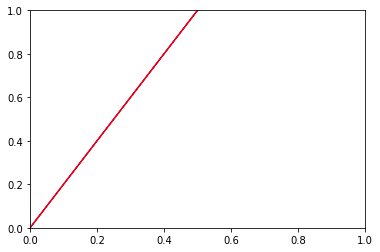

In [0]:
import matplotlib.pyplot as plt

vector_1 = [2, 4]

plt.arrow(0, 0, vector_1[0], vector_1[1], color='blue')
plt.arrow(0, 0, vector_1[0]*2, vector_1[1]*2, color='red')
plt.show()

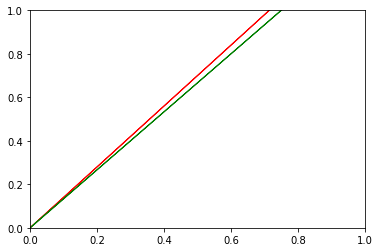

In [0]:
vector_1 = [5, 7]
vector_2 = [3, 4]
plt.arrow(0,0,vector_1[0], vector_1[1], color = 'red')
plt.arrow(0,0,vector_2[0], vector_2[1], color = 'green')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

span = a[1,2] + b[4,8]

span = [a,2a] + [4b, 8b]

span = [a + 4b, 2a + 8b]

if a = 1, b = 4
 i = 1[1,2] + 4[4,8]
 i = [1,2] + [16,32]
 i = [17,34]
 
 and if I do that for all scalars a, b, I will have a set of i-vectors that covers all the points in the span of vectors g and h

In [0]:
g = np.matrix([1,2])
h = np.matrix([4,8])

In [0]:
matrix_g_h = np.matrix([[1,4],[2,8]])



In [0]:
matrix_g_h

matrix([[1, 4],
        [2, 8]])

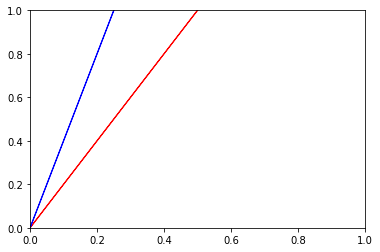

In [0]:
ax1 = plt.arrow(0,0,1,2, color='red')
ax2 = plt.arrow(0,0,2,8, color='blue')

#The span is the space between the two vectors

In [0]:
np.linalg.matrix_rank(matrix_g_h)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
matrix_lmn = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])

In [0]:
np.linalg.matrix_rank(matrix_lmn)
#this is the span of the columnspace

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-2, 2)

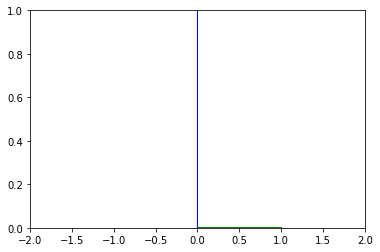

In [0]:
plt.arrow(0,0,1,0, color='green')
plt.arrow(0,0,0,1, color='blue')
plt.xlim(-2,2)

## 6.2 What does it mean to form a basis?

A basis is a pair of vectors that are linearly independent, and that span the entire space V.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
matrix_p = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])

In [0]:
np.linalg.matrix_rank(matrix_p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimensionality of the column space of that matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

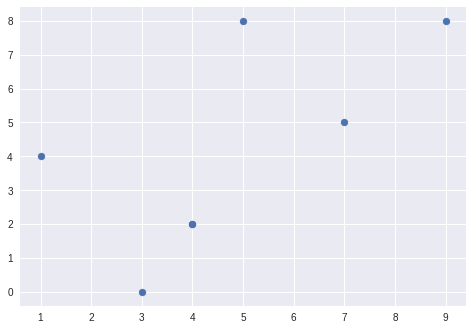

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()